In [19]:
import pandas as pd
import matplotlib.pyplot as plt
biomass = pd.read_csv("Dataset_JRC_-_Biomass_uses_and_flows.csv")



In [20]:
biomass.head()

,Geopolitical Entity,Geopolitical Entity (Id),Year,Sector,Level_Sankey,Level_Sankey (Id),Lifecycle Step,Lifecycle Step (Id),Source,Source (Id),Target,Target (Id),Flow,Flow (Id),Unit,Unit (Id),Value (THOUSAND TONS)
0,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Animal based food,Animal based food,Feed & bedding,A9,Animal-based food,A13,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (gross trade),KT_DRY_GROSS,546.633266
1,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Animal based food,Animal based food,Feed & bedding,A9,Animal-based food,A13,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (net trade),KT_DRY_NET,546.633266
2,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Exports,Exports,Biomass supply,A4,Exports,A14,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (gross trade),KT_DRY_GROSS,1236.146648
3,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Exports,Exports,Biomass supply,A4,Exports,A14,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (net trade),KT_DRY_NET,0.000000
4,Austria,AT,2008,Agriculture,L2 - Biomass by type,L2,Exports,Exports,Feed & bedding,A9,Exports,A14,Agriculture biomass,AGRI_AGGR,1000 T of dry matter (gross trade),KT_DRY_GROSS,4469.214987


In [21]:
print(biomass['Level_Sankey'].unique())
print(biomass['Sector'].unique())

['L2 - Biomass by type' 'L3 - Biomass components' 'L0 - Total biomass'
 'L1 - Biomass by sector']
['Agriculture' 'All sectors' 'Fisheries' 'Forestry']


In [35]:
biomass[['Geopolitical Entity (Id)', 'Geopolitical Entity', 'Year', 'Sector', 'Value (THOUSAND TONS)']].groupby(by=['Geopolitical Entity', 'Year', 'Sector']).sum().sort_values(by='Value (THOUSAND TONS)')

/tmp/ipykernel_1066/2715427256.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  biomass[['Geopolitical Entity (Id)', 'Geopolitical Entity', 'Year', 'Sector', 'Value (THOUSAND TONS)']].groupby(by=['Geopolitical Entity', 'Year', 'Sector']).sum().sort_values(by='Value (THOUSAND TONS)')


Value (THOUSAND TONS)
Geopolitical Entity           Year Sector                            
Hungary                       2019 Forestry              0.000000e+00
Germany                       2019 Forestry              0.000000e+00
                                   Fisheries             0.000000e+00
                              2018 Forestry              0.000000e+00
                                   Fisheries             0.000000e+00
...                                                               ...
European Union (27 countries) 2016 Agriculture           1.042083e+07
                              2018 Agriculture           1.053840e+07
                              2014 Agriculture           1.058225e+07
                              2017 Agriculture           1.078545e+07
                              2019 Agriculture           1.088741e+07

[1344 rows x 1 columns]

/tmp/ipykernel_1066/1819001289.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  biomass_2018_agriculture_net_trade = biomass[(biomass['Year'] == 2018) & (biomass['Sector'] == 'Agriculture') & (biomass['Unit (Id)'] == 'KT_DRY_NET') & (~biomass['Geopolitical Entity'].str.startswith('European'))].groupby(by=['Geopolitical Entity', 'Geopolitical Entity (Id)', 'Year', 'Sector']).sum().reset_index().sort_values(by='Value (THOUSAND TONS)', ascending=False)


<BarContainer object of 27 artists>

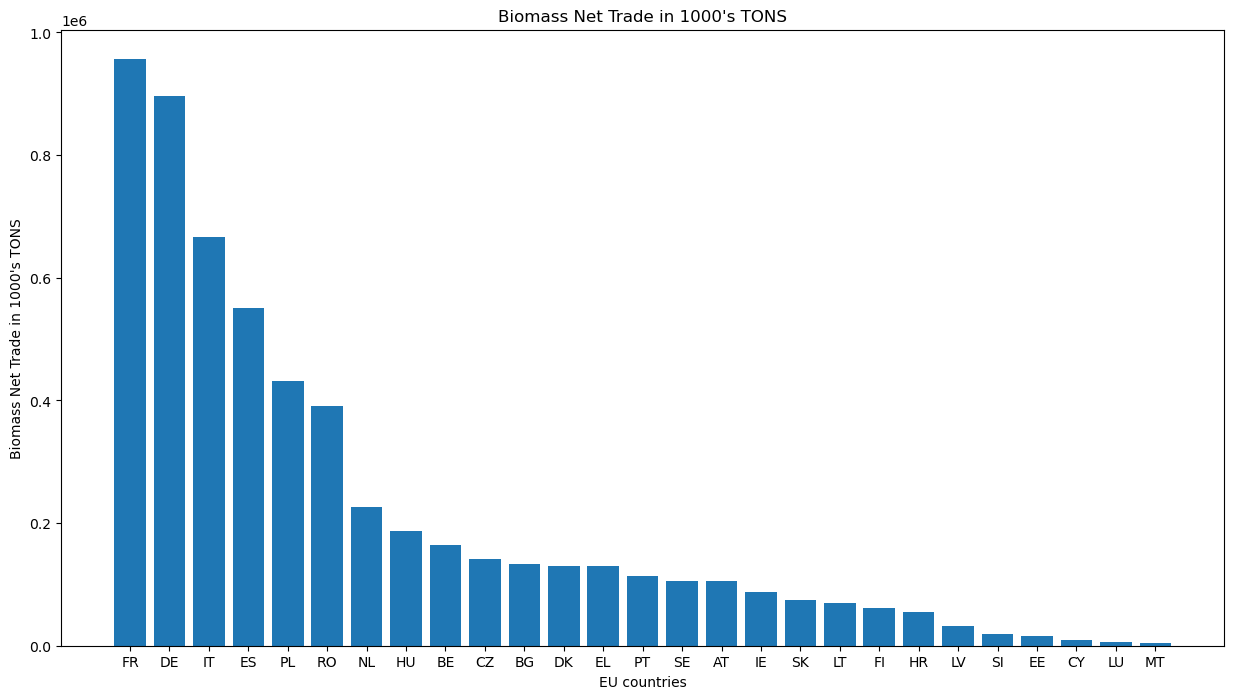

In [41]:
biomass_2018_agriculture_net_trade = biomass[(biomass['Year'] == 2018) & (biomass['Sector'] == 'Agriculture') & (biomass['Unit (Id)'] == 'KT_DRY_NET') & (~biomass['Geopolitical Entity'].str.startswith('European'))].groupby(by=['Geopolitical Entity', 'Geopolitical Entity (Id)', 'Year', 'Sector']).sum().reset_index().sort_values(by='Value (THOUSAND TONS)', ascending=False)
plt.figure(figsize=(15, 8))
plt.xlabel('EU countries')
plt.ylabel("Biomass Net Trade in 1000's TONS")
plt.title("Biomass Net Trade in 1000's TONS")
plt.bar(biomass_2018_agriculture_net_trade['Geopolitical Entity (Id)'], biomass_2018_agriculture_net_trade['Value (THOUSAND TONS)'])